#### Análisis exploratorio de los accidentes fatales

En esta archivo, se plantea la exploración de patrones dentro de los datos suministrados con el objetivo de identificar las distribuciones de las víctimas en relación con el tiempo, la frecuencia de los accidentes, las características de las víctimas, los roles involucrados y el lugar de ocurrencia de los incidentes.

In [1]:
#Importamos las librerias a utilizar
import pandas as pd 
import numpy as np
import tools 
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("homicidios_cleaned.csv")
df


,Id,Rol,Sexo,Edad,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,...,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.405969,-34.610120,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS


## Edad de las víctimas

En esta primera fase, el objetivo es comprender el patrón de distribución de las edades de las víctimas. Los gráficos siguientes presentan un histograma y un boxplot para analizar la distribución de edades.

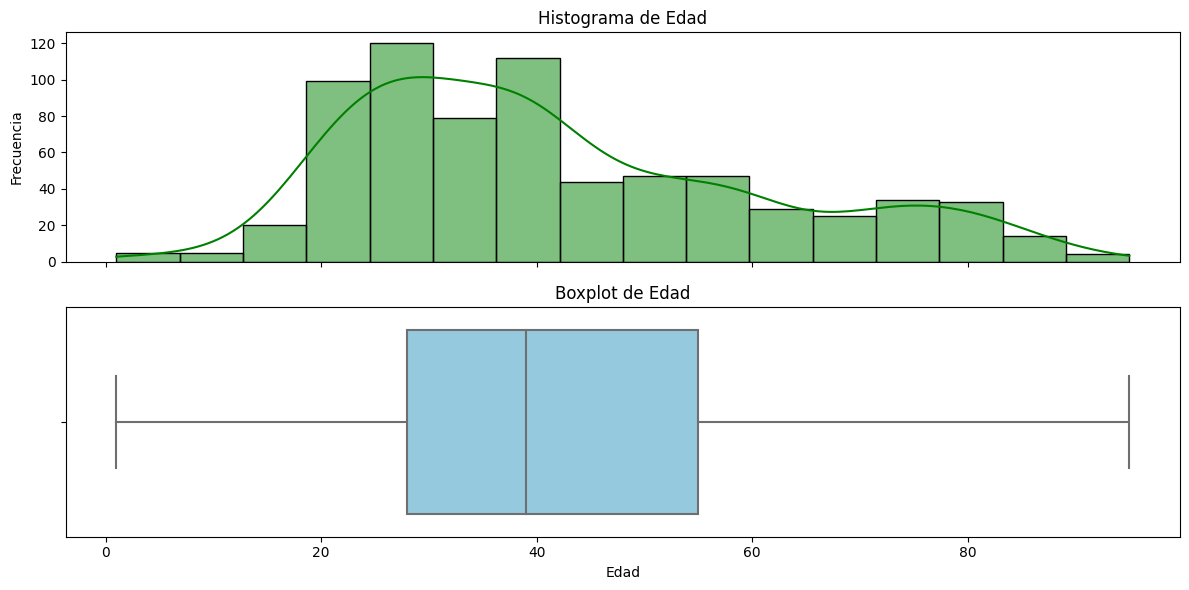

In [3]:
tools.distribucion_edad(df)

En los gráficos previos, se evidencia que el 75% de los afectados tienen menos de 55 años, con una mediana de 39 años. No se identifican edades atípicas. Aunque se registra un mínimo de 1 año y un máximo de 95 años, esto se relaciona con el registro de todas las víctimas, no necesariamente aquellas que estaban al volante durante el accidente. La distribución del histograma muestra cierto sesgo hacia la derecha, concentrando la mayor cantidad de accidentes en el rango de edades entre 20 y 40 años.

Ahora, exploraremos de manera más detallada la distribución de las edades por año.

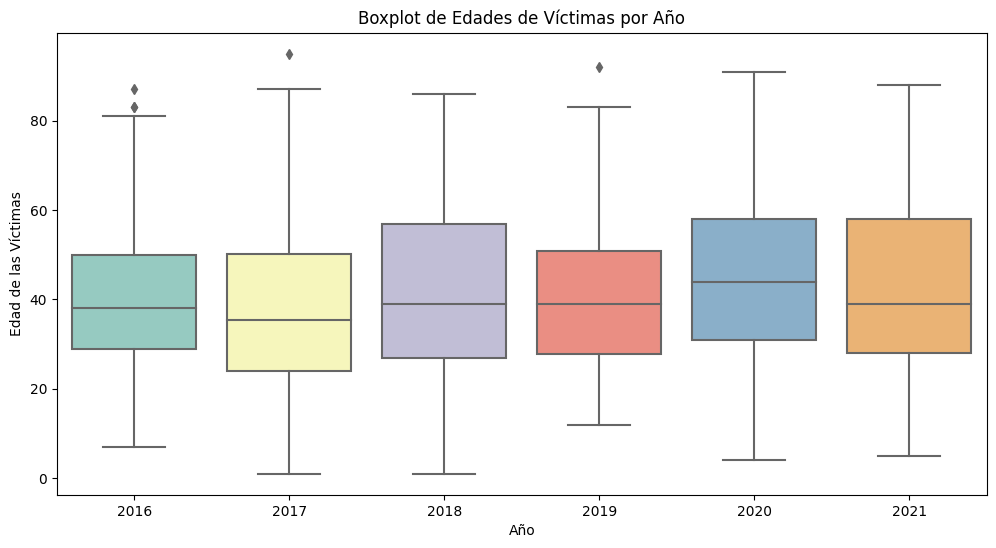

In [4]:
tools.distribucion_edad_por_anio(df)

Las distribuciones de edades muestran similitudes notables en los años registrados, con una mediana cercana a los 40 años. Se identifican algunos valores atípicos relacionados con adultos mayores que fueron víctimas de accidentes en los años 2016, 2017 y 2019.

Un análisis intrigante consistiría en explorar las diferencias entre los grupos de género masculino y femenino en términos de distribución por edades.

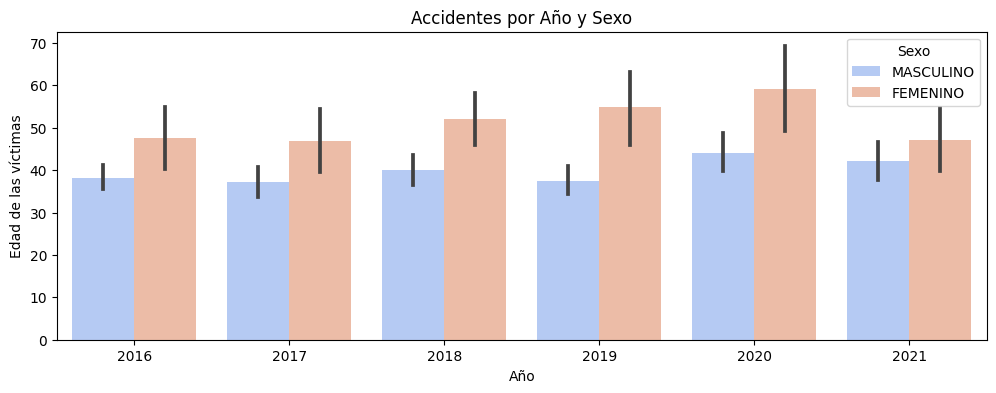

In [5]:
tools.accidentes_por_anio_y_sexo(df)

In [6]:
# Observamos los datos numéricos de ese gráfico
resumen_sexo_año = df.groupby(['Año', 'Sexo']).size().reset_index(name='Cantidad accidentes')
resumen_sexo_año

,Año,Sexo,Cantidad accidentes
0,2016,FEMENINO,27
1,2016,MASCULINO,119
2,2017,FEMENINO,36
3,2017,MASCULINO,104
4,2018,FEMENINO,38
5,2018,MASCULINO,111
6,2019,FEMENINO,27
7,2019,MASCULINO,77
8,2020,FEMENINO,16
9,2020,MASCULINO,65


En la representación gráfica previa, se aprecia que hasta el año 2020 existía una tendencia al alza en las edades de las mujeres fallecidas en comparación con los hombres, especialmente en el rango de 40 a 50 años, aunque esta tendencia disminuye en 2021. En el caso de los hombres, se observa una leve inclinación al aumento de la edad de fallecimiento, manteniéndose alrededor de los 40 años, pero aún siendo menor que la edad promedio de las mujeres.

Para realizar un análisis más específico de la magnitud de la diferencia entre los dos grupos (hombres y mujeres) se ha optado por emplear el estadístico de Cohen. Este indicador, comúnmente utilizado en pruebas de hipótesis y comparación de grupos, se denomina "D" y se calcula mediante la fórmula:

D = (Diferencia entre las medias de los grupos) / (Desviación estándar combinada de los grupos)

Donde:

- La "Diferencia entre las medias de los grupos" es la media del grupo 1 menos la media del grupo 2.
- La "Desviación estándar combinada de los grupos" representa la varianza combinada de ambos grupos.

El valor resultante de \(D\) indica cuántas desviaciones estándar se sitúa la diferencia observada con respecto a la variabilidad de los datos. Un valor mayor de \(D\) señala una magnitud de efecto más significativa, mientras que un valor menor indica un efecto más pequeño.

Se procederá a calcular este estadístico para el conjunto completo de datos, con el fin de evaluar la diferencia entre los dos grupos en términos de sexo y edades.

In [7]:
# Definimos los grupos
grupo1= df[df["Sexo"] == "MASCULINO"]["Edad"]
grupo2 = df[df["Sexo"] == "FEMENINO"]["Edad"]
# Calculamos la D de Cohen
d = tools.cohen(grupo1, grupo2)
print(f"El valor de Cohen es: {round(d,2)}")

El valor de Cohen es: -0.61


Se obtiene un valor de Cohen de -0.61 al analizar ambos grupos, indicando un efecto de tamaño moderado a alto. Esto sugiere que hay una diferencia significativa en la edad promedio entre los dos grupos, con una inclinación hacia las mujeres. En otras palabras, en promedio, el grupo de hombres tiende a ser más joven en comparación con el grupo de mujeres, corroborando la observación anterior en el gráfico.

Vamos a presentarlo a través de los años.

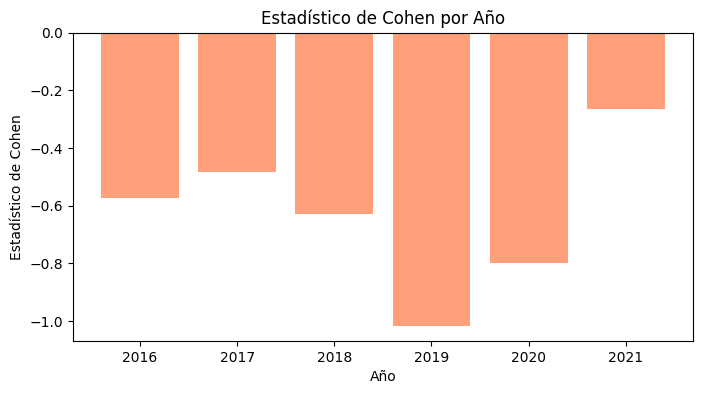

In [8]:
tools.cohen_por_año(df)

A lo largo de los años, persiste una relación negativa, lo que señala una tendencia coherente en la que, en promedio, los hombres tienden a ser más jóvenes que las mujeres en términos de edades. La magnitud del efecto, medida por el valor de Cohen, varía de un año a otro. En 2019, el valor de Cohen es el más negativo, -1.02, indicando que la diferencia en edades entre hombres y mujeres es más marcada ese año. Por otro lado, en 2021, el valor de Cohen es el menos negativo, 
-0.26, sugiriendo una diferencia más pequeña en edades entre ambos grupos en ese año.

Siguiendo con el análisis de las edades, resulta intrigante examinar la distribución de las edades según la condición de la víctima, es decir, el 'rol' en el incidente o hecho.

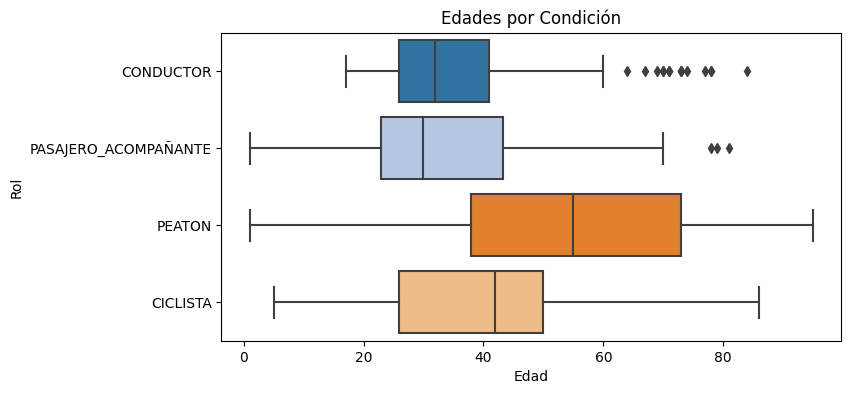

In [9]:
tools.edad_y_rol_victimas(df)

Se ha notado una similitud en las edades promedio entre los conductores de automóviles y los pasajeros acompañantes, siendo alrededor de los 35 años. Aunque la edad mínima para los conductores es de aproximadamente 18 años, se observa que en los otros roles hay víctimas más jóvenes, sugiriendo que podrían ser niños que están siendo transportados.

En el caso de los peatones, se observa una mayor variabilidad en las edades, desde niños muy pequeños hasta adultos mayores a los 90 años.

Aunque hay algunos valores atípicos en las edades de los conductores y pasajeros acompañantes, estos casos se consideran normales dentro del conjunto de datos.

Por último, se analiza la relación entre la edad y los distintos vehículos que ocupaban las víctimas o si eran peatones.

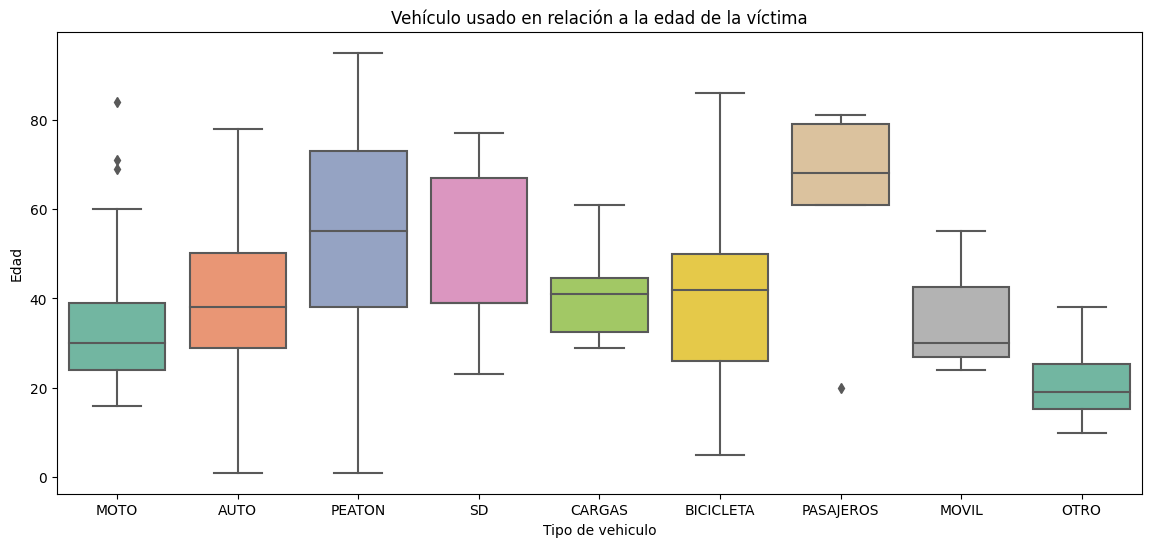

In [10]:
tools.distribucion_edad_por_victima(df)


Se nota una amplia variabilidad en las edades de las víctimas fallecidas según el vehículo que ocupaban en el momento del incidente. Es en el grupo de peatones donde se evidencia una gama más extensa de edades en comparación con las demás categorías. Las víctimas de mayor edad tienden a estar más concentradas cuando son pasajeros, mientras que las más jóvenes se observan en la categoría moto y otros.

#### Sexo de las víctimas

Aunque se han explorado aspectos relacionados entre el sexo y la edad, en esta sección se busca examinar la conexión entre el sexo de las víctimas y la frecuencia de accidentes, los roles desempeñados y el tipo de vehículo que ocupaban, o si eran peatones.



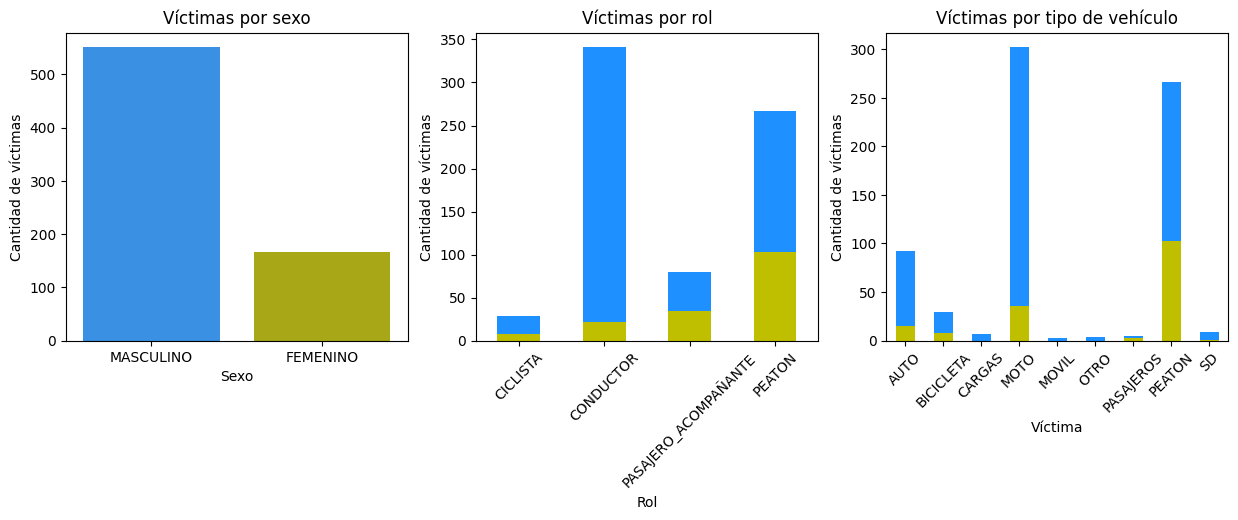

In [11]:
tools.victimas_sexo_rol_victima(df)

Se evidencia una disparidad en la cantidad de víctimas masculinas en comparación con las femeninas. Esta brecha es particularmente notable en la categoría de "Conductor", donde la mayoría de las víctimas son hombres. Llama la atención que las motocicletas presentan una proporción significativamente alta de accidentes, siendo la categoría con mayor predominancia de víctimas masculinas. En el caso de los peatones, que constituyen la categoría con la mayor cantidad de fallecimientos en accidentes, también se observa una proporción más alta de víctimas masculinas, aunque la diferencia es menos pronunciada.

#### Participantes de los accidentes

En este punto se analizan las cantidades de víctimas en función de los vehículos o medios de transporte que participaron de hecho.

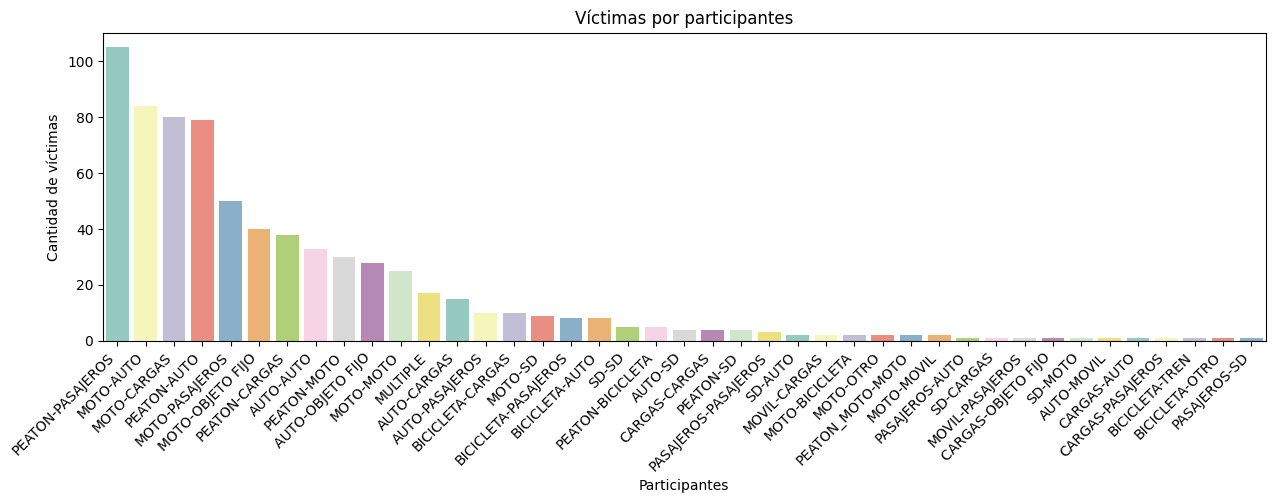

In [12]:
tools.victimas_participantes(df)


Es notable que la mayoría de las víctimas se registren en incidentes donde están involucrados peatones junto con pasajeros. Según la definición proporcionada en el diccionario de datos, se considera peatón a cualquier persona afectada que no sea conductor o pasajero de un vehículo, mientras que un pasajero se refiere a cualquier persona lesionada dentro, descendiendo o ascendiendo de unidades de transporte público de pasajeros y autobuses de larga distancia. Para tratar de comprender este fenómeno, se examinan detenidamente los registros de estos casos específicos.

In [13]:
df[df["Participantes"] == "PEATON-PASAJEROS"][['Participantes', 'Víctima', 'Acusado']]

,Participantes,Víctima,Acusado
13,PEATON-PASAJEROS,PEATON,PASAJEROS
21,PEATON-PASAJEROS,PEATON,PASAJEROS
23,PEATON-PASAJEROS,PEATON,PASAJEROS
27,PEATON-PASAJEROS,PEATON,PASAJEROS
34,PEATON-PASAJEROS,PEATON,PASAJEROS
...,...,...,...
679,PEATON-PASAJEROS,PEATON,PASAJEROS
684,PEATON-PASAJEROS,PEATON,PASAJEROS
685,PEATON-PASAJEROS,PEATON,PASAJEROS
706,PEATON-PASAJEROS,PEATON,PASAJEROS


Al revisar los datos relacionados con la categoría de "Peatón-Pasajero" en el registro de participantes, se interpreta que cuando la víctima es un peatón y el implicado es un pasajero, probablemente se refiera a incidentes asociados con personas que subían, bajaban o se trasladaban en algún medio de transporte público. A partir de este punto, se considerará esta interpretación, teniendo en cuenta esta observación hasta que sea confirmada o refutada por las personas interesadas.

En cuanto al gráfico previo, se observa que los incidentes que involucran motocicletas, automóviles y vehículos de carga son aquellos que acumulan la mayor cantidad de víctimas.


#### Acusados en los accidentes

In [14]:
df.head()


,Id,Rol,Sexo,Edad,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,...,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


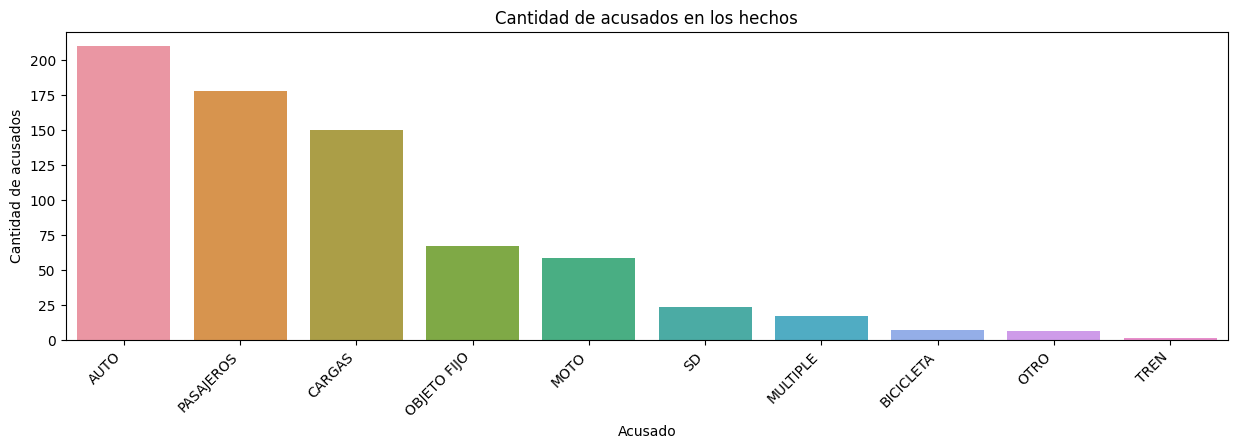

In [15]:
tools.cantidad_acusados(df)

La interpretación derivada de este gráfico sugiere que la principal responsabilidad en los incidentes registrados recae en los conductores de autos, seguidos por los pasajeros y los vehículos de carga (referidos a vehículos de carga). En el caso de los pasajeros, esta observación se alinea con la interpretación previa relacionada con el punto anterior, donde se estableció que la categoría "Peatón-Pasajero" podría estar vinculada a incidentes asociados con el transporte público, proporcionando sentido a lo discutido.


#### Tipo de calle de los accidentes 

En este apartado, el objetivo es identificar patrones en relación al tipo de calle donde se desarrollan los incidentes, así como determinar si se trata de cruces de calles o no.

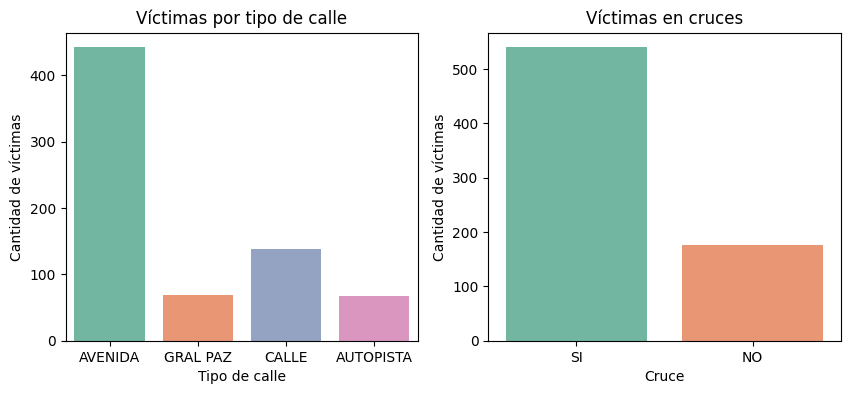

In [16]:
tools.tipo_de_calle(df)

Se observa que la mayoría de los incidentes con víctimas fatales tienen lugar en avenidas, destacándose especialmente en las intersecciones de calles.

Ya se ha analizado el género de las personas, la edad, las partes involucradas. Ahora, nos enfocaremos en el tiempo.


#### Distribución mensual
Se analiza el total de accidentes fatales de manera mensual y se relaciona con los años.

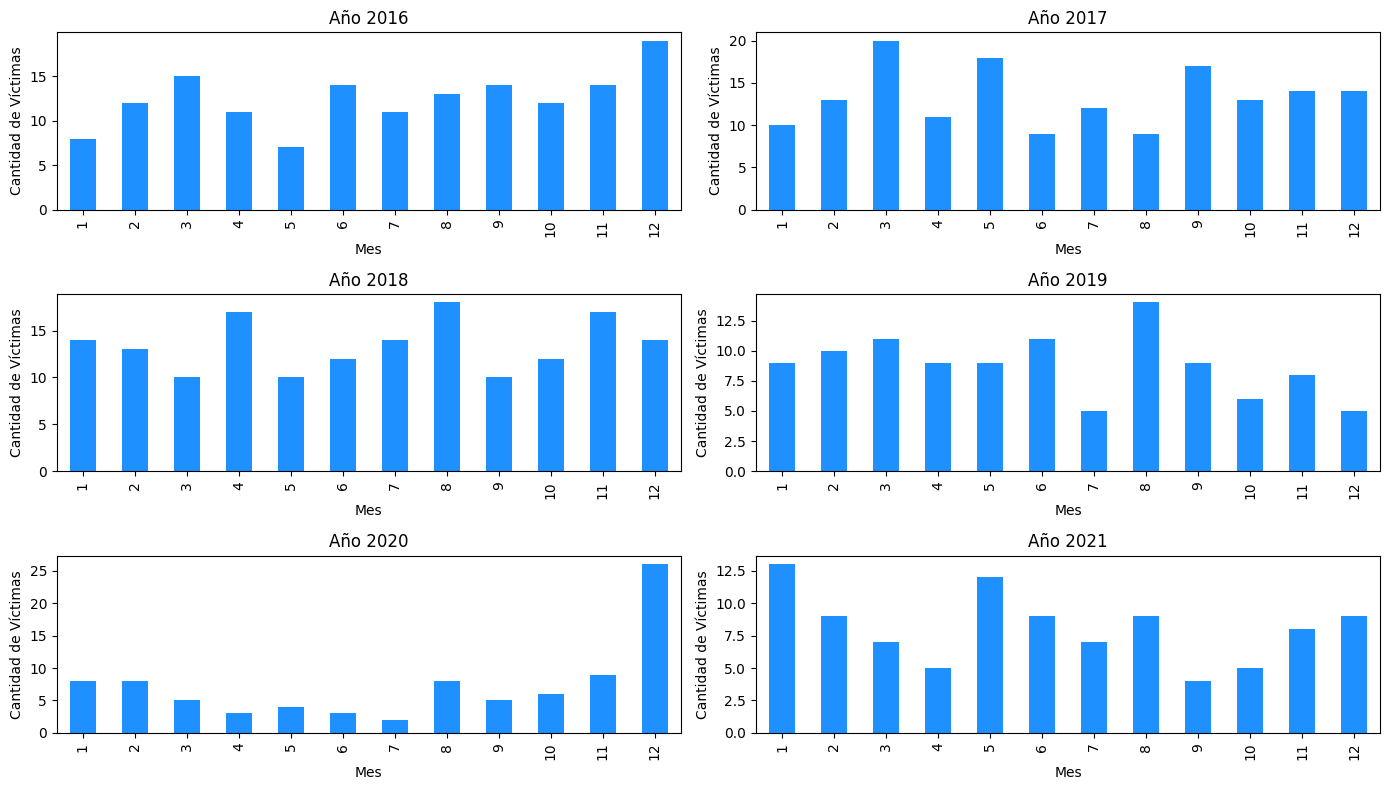

In [17]:
tools.accidentes_mensuales(df)

De acuerdo con las gráficas, no se percibe un patrón consistente a lo largo del año al comparar entre los diferentes años. Los picos de accidentes mortales no coinciden en los mismos meses en los años registrados. Sin embargo, se destaca claramente una reducción significativa de accidentes fatales desde diciembre de 2019 hasta noviembre de 2020, la cual se asocia con las medidas de cuarentena implementadas debido a la pandemia de COVID-19.

El mes con menor cantidad de víctimas tiene 51 víctimas
El mes con mayor cantidad de víctimas tiene 87 víctimas


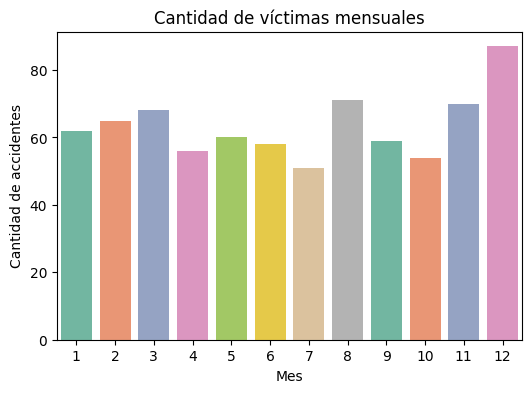

In [18]:
tools.victimas_mensuales(df)

Al analizar la distribución anual de todos los registros disponibles, se nota un patrón consistente a lo largo del año, con un aumento notable de accidentes en el mes de diciembre. Los meses que presentan la mayor cantidad de accidentes fatales son diciembre, noviembre y agosto, mientras que julio y octubre muestran la menor incidencia de estos incidentes mortales.


#### Distribución semanal 

En esta sección, se intenta identificar patrones en la frecuencia de accidentes a lo largo de la semana.



El día de la semana con menor cantidad de víctimas tiene 101 víctimas
El día de la semana con mayor cantidad de víctimas tiene 117 víctimas
La diferencia porcentual es de 15.84


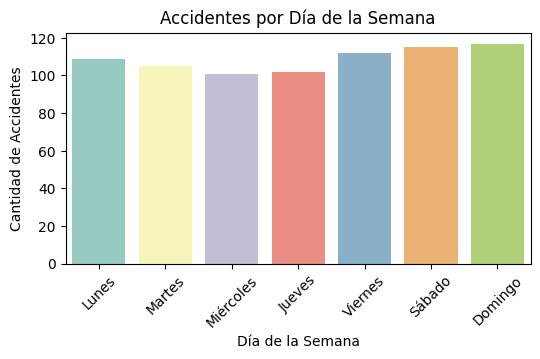

In [19]:
tools.victimas_por_dia_semana(df)

Analizando el conjunto completo de registros, se observa que la incidencia de accidentes tiende a concentrarse desde los viernes hasta los lunes, siendo el domingo el día con la frecuencia más alta y el jueves con la más baja. No obstante, la variación entre la cantidad mínima y máxima de accidentes registrados durante la semana es del 15.84%.

#### Momento del día
En este análisis, se introdujo una nueva columna que caracteriza distintos momentos del día según el siguiente criterio:

Mañana: de 6:00 a 10:59
Mediodía: de 11:00 a 13:59
Tarde: de 14:00 a 18:59
Noche: de 19:00 a 23:59
Madrugada: de 24:00 a 05:59

A continuación, se presenta la distribución de la cantidad de accidentes en cada una de estas categorías.

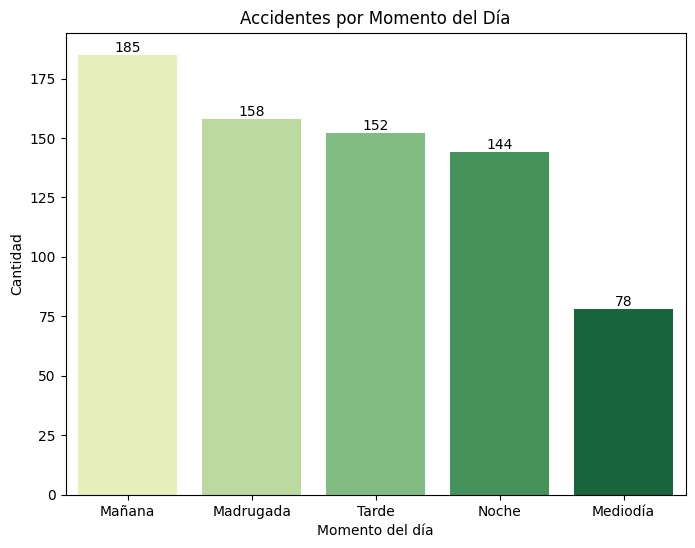

In [20]:
tools.accidentes_por_tiempo_del_dia(df)


Se puede notar que cerca del 26% de los accidentes tienen lugar en la mañana, un período en el que la actividad laboral es significativa. En contraste, durante el mediodía se registra un porcentaje considerablemente menor de accidentes fatales en comparación con otros momentos del día.

Ahora, para obtener un análisis más detallado, se examina la distribución horaria de los accidentes.

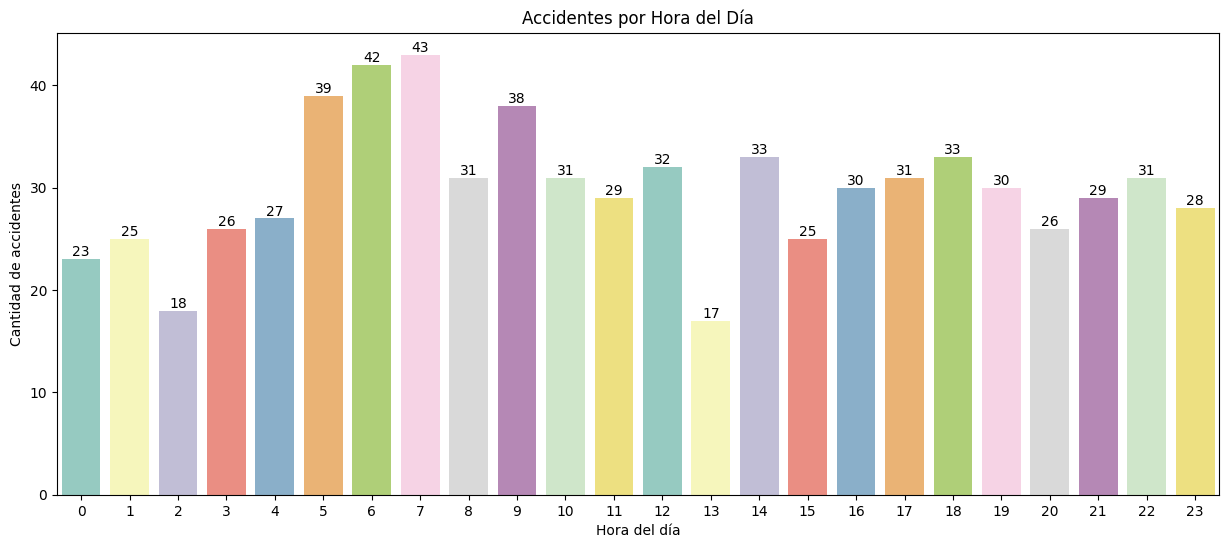

In [21]:
tools.accidentes_por_horas_del_dia(df)

Al examinar detalladamente la distribución horaria de los accidentes, se destaca el período entre las 5 y las 8 de la mañana como el momento con la mayor cantidad de incidentes. Posteriormente, se observa un pico alrededor de las 9 de la mañana, seguido de tres momentos específicos a las 14:00, 18:00 y 22:00 horas.

#### Días de la semana vs fin de semana

Se comparará la cantidad de accidentes en días laborales y fin de semana.

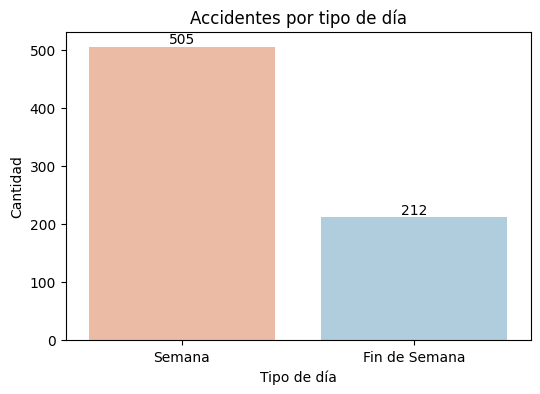

In [22]:
tools.accidentes_fin_de_semana(df)

A partir del gráfico, se observa que la mayoría de los accidentes registrados ocurrieron durante la semana, representando más del doble de los incidentes durante el fin de semana. Este hallazgo contrasta con la observación anterior, donde se identificaron las mayores cantidades entre el viernes y el lunes. Sin embargo, al acumular los accidentes de lunes a viernes como una única medida, se evidencia que los días laborables tienen un total superior en comparación con los fines de semana.